In [16]:
#commissionemployee
"""CommissionEmployee base class"""
from decimal import Decimal 

class CommissionEmployee:
    """An employee who gets paid commission basedon gross sales"""
    
    def __init__(self, first_name, last_name, ssn, 
                 gross_sales, commission_rate):
        """Initialize CommissionEmployee's attributes."""
        self._first_name = first_name
        self._last_name = last_name
        self._ssn = ssn 
        self._gross_sales = gross_sales 
        self._commission_rate = commission_rate 
        
    @property 
    def first_name(self):
        return self._first_name
    
    @property 
    def last_name(self):
        return self._last_name
    
    @property 
    def ssn(self):
        return self._ssn 
    
    @property 
    def gross_sales(self):
        return self._gross_sales
    
    @gross_sales.setter 
    def gross_sales(self, sales):
        """Set gross sales or raise ValueError if invalid"""
        if sales < Decimal('0.00'):
            raise ValueError('Gross sales must be >= to 0')
        
        self._gross_sales = sales
        
    @property 
    def commission_rate(self):
        return self._commission_rate
    
    @commission_rate.setter
    def commission_rate(self, rate):
        """Set commission rate or raise ValueError if invalid."""
        if not(Decimal('0.0') < rate < Decimal('1.0')):
            raise ValueError('Interest rate must be greater than 0 or less than 1')
        
        self._commission_rate = rate 
        
        
    def earnings(self):
        """Calculate earnings"""
        return self._gross_sales * self._commission_rate
    
    
    def __repr__(self):
        """Return tring representation for repr()"""
        return ('ComissionEmployee: '+
                f'{self.first_name} {self.last_name}\n'+
                f'social security number: {self._ssn}\n'+
                f'gross sales: {self._gross_sales:.2f}\n' +
                f'commission rate: {self._commission_rate:2f}')
        

In [17]:
c = CommissionEmployee('Sue', 'Jones', '333-33-3333', Decimal('10000.00'), Decimal('0.06'))
c

ComissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 10000.00
commission rate: 0.06

In [18]:
print(f'{c.earnings():,.2f}')

600.00


In [19]:
c.gross_sales = Decimal('20000.00')
c.commission_rate = Decimal('0.1')

print(f'{c.earnings():,.2f}')

2,000.00


In [20]:
from decimal import Decimal 

class SalariedCommissionEmployee(CommissionEmployee):
    """An employee who gets paid a salary plus
    commission basedon gross sales"""
    
    def __init__(self, first_name, last_name, ssn, gross_sales, commission_rate,base_salary):
        super().__init__(first_name, last_name, ssn, gross_sales, commission_rate)
        self._base_salary = base_salary # validate via property 
        
    @property 
    def base_salary(self):
        return self._base_salary
    
    @base_salary.setter 
    def base_salary(self,salary):
        """Set the base salary or raise ValueError if invalid"""
        if salary < Decimal('0.00'):
            raise ValueError('Base salary must be >= to 0')
        
        self._base_salary = salary
        
    def earnings(self):
        """Calculate earnings"""
        return super().earnings() + self.base_salary
    
    def __repr__(self):
        """Return string representation fo repr()"""
        return ('Salaried' + super().__repr__() +
                f'\nbase salary: {self.base_salary:.2f}')

In [21]:
s = SalariedCommissionEmployee('Bob', 'Lewis', '444-44-4444', Decimal('5000.00'),
                               Decimal('0.04'), Decimal('300.00'))

print(s.first_name, s.last_name, s.ssn, s.gross_sales, s.commission_rate, s.base_salary)

Bob Lewis 444-44-4444 5000.00 0.04 300.00


In [22]:
print(f'{s.earnings():,.2f}')

500.00


In [23]:
s.gross_sales = Decimal('10000.00')
s.commission_rate = Decimal('0.05')
s.base_salary = Decimal('1000.00')


print(s)

SalariedComissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 10000.00
commission rate: 0.05
base salary: 1000.00


In [24]:
print(f'{s.earnings():,.2f}')

1,500.00


In [25]:
issubclass(SalariedCommissionEmployee, CommissionEmployee)

True

In [26]:
isinstance(s, CommissionEmployee)

True

In [27]:
isinstance(s, SalariedCommissionEmployee)

True

In [28]:
employees = [c, s]

for employee in employees:
    print(employee)
    print(f'{employee.earnings():,.2f}\n')

ComissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 20000.00
commission rate: 0.1
2,000.00

SalariedComissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 10000.00
commission rate: 0.05
base salary: 1000.00
1,500.00



In [31]:
class WellPaidDuck:
    def __repr__(self):
        return 'I am a well-paid duck'
    
    def earnings(self):
        return Decimal('1_000_000.00')

In [33]:
d = WellPaidDuck()
employees = [c, s, d]

for employee in employees:
    print(employee)
    print(f'{employee.earnings():,.2f}\n')

ComissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 20000.00
commission rate: 0.1
2,000.00

SalariedComissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 10000.00
commission rate: 0.05
base salary: 1000.00
1,500.00

I am a well-paid duck
1,000,000.00



In [35]:
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101,10)]

temps

[(0, -17.77777777777778),
 (10, -12.222222222222223),
 (20, -6.666666666666667),
 (30, -1.1111111111111112),
 (40, 4.444444444444445),
 (50, 10.0),
 (60, 15.555555555555557),
 (70, 21.11111111111111),
 (80, 26.666666666666668),
 (90, 32.22222222222222),
 (100, 37.77777777777778)]

,Fahrenheit,Celsius
0,0,-17.777778
1,10,-12.222222
2,20,-6.666667
3,30,-1.111111
4,40,4.444444
5,50,10.000000
6,60,15.555556
7,70,21.111111
8,80,26.666667
9,90,32.222222


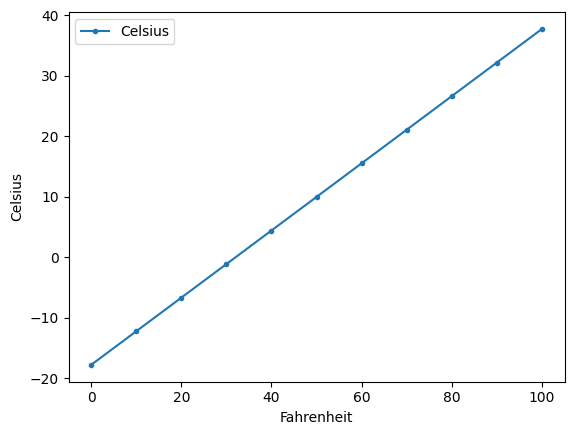

In [40]:
import pandas as pd 

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

temps_df

In [41]:
import pandas as pd 

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [42]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [43]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [44]:
nyc.Date.dtype

dtype('int64')

In [45]:
nyc.Date = nyc.Date.floordiv(100)

In [46]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [47]:
pd.set_option('display.precision', 2)

In [48]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [49]:
from scipy import stats 

linear_regression = stats.linregress(x=nyc.Date, y = nyc.Temperature)

In [50]:
linear_regression.slope * 2019 + linear_regression.intercept 

np.float64(38.51837136113297)

In [51]:
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

(10.0, 70.0)

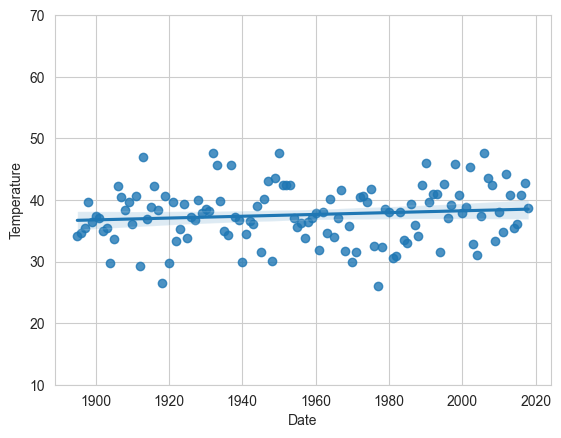

In [56]:
import seaborn as sns 

sns.set_style('whitegrid')


axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)